# Исходные данные

В данной работе рассматривается индекс экономической свободы на основе статистических пакетов языка Python и облачной вычислительной среды Google Colabaratory, данные взяты с https://www.fraserinstitute.org/studies/economic-freedom-of-the-world-2016-annual-report 

Statsmodels-это модуль Python, который предоставляет классы и функции для оценки множества различных статистических моделей, а также для проведения статистических тестов и исследования статистических данных. Для каждого оценщика доступен обширный список статистики результатов. Полученные результаты проверяются на соответствие существующим статистическим пакетам, чтобы убедиться в их правильности

Категории

1: Размер правительства - По мере увеличения 
государственных расходов, налогообложения и размера
контролируемых государством предприятий принятие государственных
решений заменяется индивидуальным выбором, а экономическая
свобода сокращается.

2: Правовая система и права собственности - Защита лиц и
их законно приобретенной собственности является центральным элементом как
экономической свободы, так и гражданского общества. Действительно, это самая важная
функция правительства.

3: Надежные деньги - Инфляция подрывает ценность законно заработанных
заработных плат и сбережений. Таким образом, надежные деньги необходимы для защиты собственности
права. Когда инфляция не только высока, но и нестабильна, людям становится
трудно планировать будущее и, таким образом, эффективно использовать
экономическую свободу.

4: Свобода международной торговли - Свобода обмена—в самом
широком смысле, покупка, продажа, заключение контрактов и т. Д.—имеет
существенное значение для экономической свободы, которая уменьшается, когда свобода
обмена не включает предприятия и отдельных лиц в других
странах.

5: Регулирование - Правительства не только используют ряд инструментов для
ограничения права на международный обмен, но и могут развивать
обременительные правила, которые ограничивают право на обмен, получение кредита,
наем или работу для кого вы хотите, или свободное ведение вашего бизнеса.


# Добавление библиотек для работы с таблицами, статистики и вывода графиков 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Добавление файла CSV с которым мы работаем


In [2]:
data = pd.read_csv('efw_cc.csv')
data.shape

(3726, 36)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                3726 non-null   int64  
 1   ISO_code                            3726 non-null   object 
 2   countries                           3726 non-null   object 
 3   ECONOMIC FREEDOM                    3003 non-null   float64
 4   rank                                3003 non-null   float64
 5   quartile                            3003 non-null   float64
 6   1a_government_consumption           3137 non-null   float64
 7   1b_transfers                        2766 non-null   float64
 8   1c_gov_enterprises                  3080 non-null   float64
 9   1d_top_marg_tax_rate                2679 non-null   float64
 10  1_size_government                   3079 non-null   float64
 11  2a_judicial_independence            2173 no

In [4]:
data.year.value_counts().sort_index().index

Int64Index([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64')

Получение вывода первых 10 строк таблицы + наименования колонок 

In [5]:
data.head(10)

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,2c_protection_property_rights,2d_military_interference,2e_integrity_legal_system,2f_legal_enforcement_contracts,2g_restrictions_sale_real_property,2h_reliability_police,2i_business_costs_crime,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.74360,10.0,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.72046,5.0,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,3.333333,4.166667,2.302200,5.455882,3.016104,4.291197,0.846154,2.963635,9.385679,4.986742,3.05400,5.0,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,7.500000,3.333333,3.632872,6.857195,3.385786,4.133832,0.769231,3.904030,5.233264,5.224079,2.00000,10.0,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,5.833333,5.000000,5.196693,9.801963,5.714028,7.007654,1.000000,5.809215,9.078264,9.263496,9.74600,10.0,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
5,2016,AUS,Australia,7.98,10.0,1.0,4.511765,6.664948,10.0,5.0,6.544178,8.766929,5.610653,7.998304,10.000000,9.166667,6.025331,8.205655,8.707445,6.790183,1.000000,7.919019,8.564838,9.500704,9.74462,10.0,9.452540,8.820000,7.427103,10.00000,3.859781,7.526721,9.576358,7.698589,8.121631,8.465526
6,2016,AUT,Austria,7.58,27.0,1.0,3.744118,3.101062,10.0,3.5,5.086295,7.650855,5.482200,8.092565,10.000000,10.000000,6.220993,8.100494,8.501867,7.194909,1.000000,7.915987,8.033869,9.875451,9.82200,10.0,9.432830,8.266133,8.254011,10.00000,5.906786,8.106733,9.129015,5.565118,7.419870,7.371334
7,2016,AZE,Azerbaijan,6.49,106.0,3.0,6.320588,7.881208,0.0,6.5,5.175449,5.676886,5.861119,6.321836,5.000000,5.833333,7.252962,9.830312,6.170495,7.280192,0.717949,5.652732,9.240398,6.649350,9.16420,5.0,7.513487,7.973778,6.799052,10.00000,4.093268,7.216525,7.467778,6.076782,7.080078,6.874880
8,2016,BHS,Bahamas,7.34,49.0,2.0,7.085294,9.040503,7.0,10.0,8.281449,NaN,6.700000,NaN,10.000000,6.666667,4.699257,6.149350,NaN,NaN,0.945946,6.658107,8.654101,8.975514,9.93080,0.0,6.890104,3.253067,8.105925,10.00000,5.384615,6.685902,8.622733,8.361606,7.523034,8.169125
9,2016,BHR,Bahrain,7.56,30.0,1.0,3.688235,9.581704,10.0,10.0,8.317485,6.822563,6.231401,7.435713,5.000000,7.500000,4.785814,8.855315,7.764706,7.287250,0.536585,5.265602,9.961596,8.215418,9.44040,10.0,9.404353,8.523200,6.295595,10.00000,4.794819,7.403403,7.609167,6.619418,8.018774,7.415786


# Очистка данных

In [6]:
data.isnull().sum()

year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                       723
rank                                   723
quartile                               723
1a_government_consumption              589
1b_transfers                           960
1c_gov_enterprises                     646
1d_top_marg_tax_rate                  1047
1_size_government                      647
2a_judicial_independence              1553
2b_impartial_courts                   1179
2c_protection_property_rights         1129
2d_military_interference              1186
2e_integrity_legal_system             1153
2f_legal_enforcement_contracts        1361
2g_restrictions_sale_real_property    1384
2h_reliability_police                 2071
2i_business_costs_crime               2071
2j_gender_adjustment                    66
2_property_rights                      755
3a_money_growth                        644
3b_std_infl

Удаление Объектов С Более Чем 1242 Нулевыми Значениями
Здесь используются только те переменные, которые имеют более 1/3 ненулевых значений. Поскольку заполним значения NaN его медианой, этих столбцы, когда у них есть только несколько данных.

In [7]:
data = data.loc[:, (data.isnull().sum(axis=0) <= 1242)]

Переименуем столбцы для лучшего понимания

In [8]:
data.rename(columns={'year': 'YEAR',
                     'ISO_code': 'ISO_CODE',
                     'countries': 'COUNTRY',
                     'rank' :'RANK',
                     'quartile': 'QUARTILE',
                     'ECONOMIC FREEDOM': 'SCORE',
                     '1a_government_consumption': 'GOV_CONSUMPTION',
                     '1b_transfers': 'TRANSFERS',
                     '1c_gov_enterprises': 'GOV_ENTERPRISES',
                     '1d_top_marg_tax_rate': 'TOP_MARG_TAX_RATE',
                     '1_size_government': 'GOV_SIZE',
                     '2b_impartial_courts': 'IMPARTIAL_COURTS', 
                     '2c_protection_property_rights': 'PROTEC_PROP_RIGHTS',
                     '2d_military_interference': 'MILITARY_INTERF',
                     '2e_integrity_legal_system': 'INTEGRITY_LEGAL_SYST',
                     '2j_gender_adjustment': 'GENDER_ADJUSTMENT',
                     '2_property_rights': 'PROPERTY_RIGHTS',
                     '3a_money_growth': 'MONEY_GROWTH',
                     '3b_std_inflation': 'STD_INFLATION',
                     '3c_inflation': 'INFLATION',
                     '3d_freedom_own_foreign_currency': 'FOREIGN_CURRENCY',
                     '3_sound_money': 'SOUND_MONEY',
                     '4a_tariffs': 'TARIFFS',
                     '4c_black_market': 'BLACK_MARKET',
                     '4d_control_movement_capital_ppl': 'CONTROL_MOVEMENT',
                     '4_trade': 'TRADE',
                     '5a_credit_market_reg': 'CREDIT_MARKET_REG',
                     '5b_labor_market_reg': 'LABOR_MARKET_REG',
                     '5_regulation': 'REGULATION'}, inplace=True)

Заполняем недостающие значения с помощью медианы. Это не сильно повлияет на дисперсию, потому что функция будет получать медиану по странам, так что вероятность того, что значение будет правильным, выше.

In [9]:
data.QUARTILE = data.QUARTILE.fillna(method='ffill')

num_names = data._get_numeric_data().columns

data[num_names] = data.groupby('ISO_CODE')[num_names].transform(lambda x: x.fillna(x.median()))

In [10]:
data.isnull().sum()

YEAR                      0
ISO_CODE                  0
COUNTRY                   0
SCORE                     0
RANK                      0
QUARTILE                  0
GOV_CONSUMPTION           0
TRANSFERS               253
GOV_ENTERPRISES         115
TOP_MARG_TAX_RATE         0
GOV_SIZE                  0
IMPARTIAL_COURTS          0
PROTEC_PROP_RIGHTS       69
MILITARY_INTERF           0
INTEGRITY_LEGAL_SYST    368
GENDER_ADJUSTMENT         0
PROPERTY_RIGHTS           0
MONEY_GROWTH              0
STD_INFLATION             0
INFLATION                 0
FOREIGN_CURRENCY          0
SOUND_MONEY               0
TARIFFS                  23
BLACK_MARKET             23
CONTROL_MOVEMENT          0
TRADE                     0
CREDIT_MARKET_REG         0
LABOR_MARKET_REG          0
REGULATION                0
dtype: int64

Как мы видим, есть некоторые значения, не заполненные функцией. Это, вероятно, произошло потому, что ни в один год, соответствующей страны не было этой информации, чтобы взять медиану.

Но мы можем немного приблизиться, взяв медиану соответствующего квартиля. Учитывая, что страны одного квартиля имеют общие черты.

In [11]:
data.QUARTILE = data.QUARTILE.astype('object')

data[['TRANSFERS','GOV_ENTERPRISES','PROTEC_PROP_RIGHTS','INTEGRITY_LEGAL_SYST','TARIFFS','BLACK_MARKET']] = data.groupby('QUARTILE')\
    [['TRANSFERS','GOV_ENTERPRISES','PROTEC_PROP_RIGHTS','INTEGRITY_LEGAL_SYST','TARIFFS','BLACK_MARKET']].transform(lambda x: x.fillna(x.median()))

# Средний рост глобальной экономической свободы

Создаем новую таблицу из исходной со столбцами Экономическая свобода и год, группируем по годам и средним значениям по всем странам.

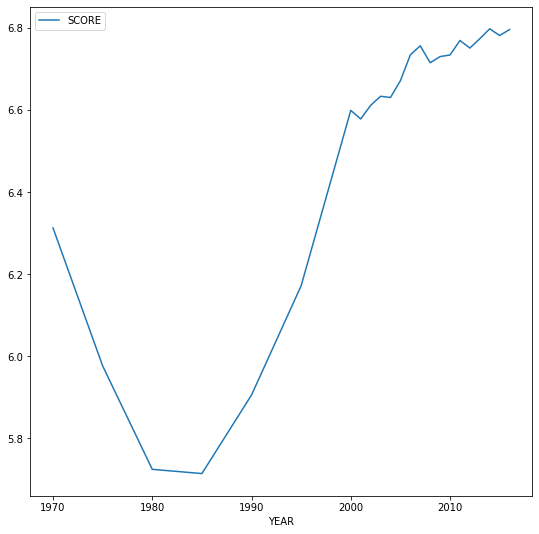

In [12]:
data_year=data[['SCORE','YEAR']]
data_year.groupby('YEAR').mean().plot(figsize=[9,9],)


Получили динамику изменения среднего значения индекса Экономической свободы за период с 1970-2016. Высокий уровень свободы в начале 70-х обусловлен движением Хиппи в США и Европе, а так же "Оттепели" и открытию железного занавеса в СССР. Упадок в 80-х можно обосновать тем, что движение Хиппи было подавлено, начались исламские революции на Ближнем Востоке, перевороты в Африканских странах, война в Афганестане, усиление коммунистической партии в Китае. Далее следует улучение ситуации в мире, до 2001 года. Что обусловлено террактом 11 сентября, войне в Персидсем заливе, серии террактов в России, что в целом, ввело ряд огранечений на экономическую свободу. И последний серьезный спад был в 2007-2009 годах, когда произошел Международный Финансовый Кризис, в следствии чего, было введено значительно мер, направленных на ужесточения регулирования финансового сектора. 

In [13]:
data_geo=data[['SCORE','ISO_CODE','COUNTRY','YEAR']]
fig = px.scatter_geo(data_geo, locations="ISO_CODE", color="SCORE",
                     hover_name="COUNTRY",
                     animation_frame="YEAR",
                     projection="natural earth")
fig.show()

# Топ лучших и худших стран с экономической свободой

Набор данных содержит индекс для каждой страны с 1970 по 2016 год. Мы можем проверить, какие из них находятся на дне и в топе за 2016 год.

15 наименее Экономически свободных стран в 2016 году

Text(0.5, 1.0, '15 наименее Экономически свободных стран в 2016')

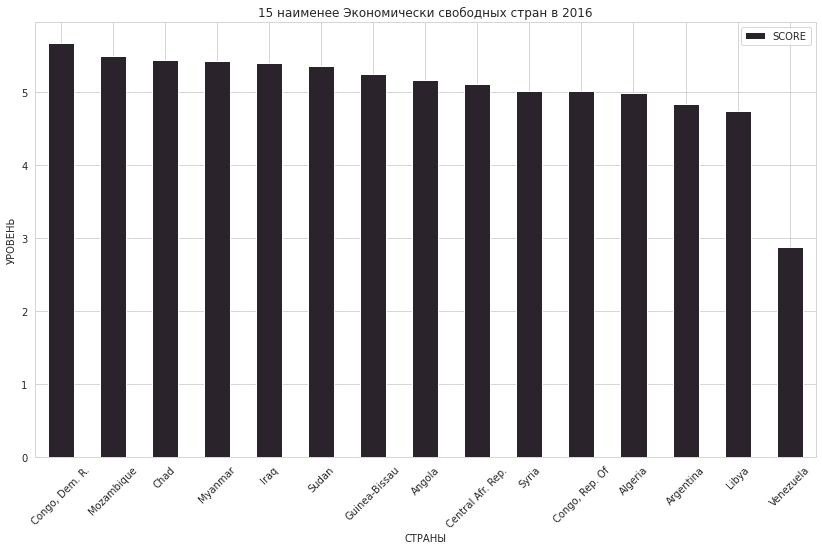

In [14]:
sns.set_palette(sns.dark_palette('purple',15, reverse=False))
sns.set_style('whitegrid')

top_15_16_least = data[data.YEAR==2016].sort_values(by='SCORE', ascending=False).tail(15)
top_15_16_least.plot('COUNTRY', 'SCORE', kind='bar', figsize=(14,8), rot=45)

plt.xlabel('СТРАНЫ')
plt.ylabel('УРОВЕНЬ')
plt.title('15 наименее Экономически свободных стран в 2016')

Большинство из 15 наименее развитых стран имеют примерно одинаковый балл. Только в Венесуэле, последней стране в рейтинге 2016 года, мы видим огромную разницу по сравнению с другими. Венесуэла переживает один из самых больших кризисов за последние несколько лет.

Другой заметный факт заключается в том, что большинство из них являются африканскими и азиатскими странами, за исключением Аргентины и Венесуэлы, которые расположены в Южной Америке.

15 наиболее Экономически свободных стран в 2016 году

Text(0.5, 1.0, '15 наиболее Экономически свободных стран')

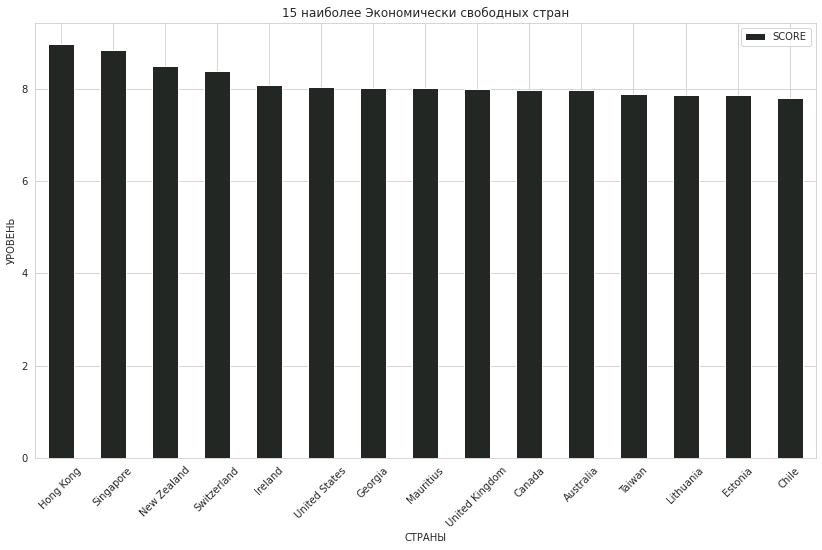

In [15]:
sns.set_palette(sns.dark_palette("seagreen",15, reverse=False))
sns.set_style('whitegrid')

top_15_2016 = data[data.YEAR==2016].sort_values(by='SCORE', ascending=False).head(15)
top_15_2016.plot('COUNTRY', 'SCORE', kind='bar', figsize=(14,8), rot=45)

plt.xlabel('СТРАНЫ')
plt.ylabel('УРОВЕНЬ')
plt.title('15 наиболее Экономически свободных стран')

Учитывая, что это топ-15 стран в 2016 году, мы не видим большой разницы между ними. Единственное замечание, которое можно сделать, состоит в том, что большинство этих стран из Европы или Азии, и у нас есть только одна из Африки (Маврикий) и одна из Южной Америки (Чили).

Но всегда ли эти страны были экономически свободны?

Text(0.5, 1.0, 'Динамика рейтинга с 1970 по 2016')

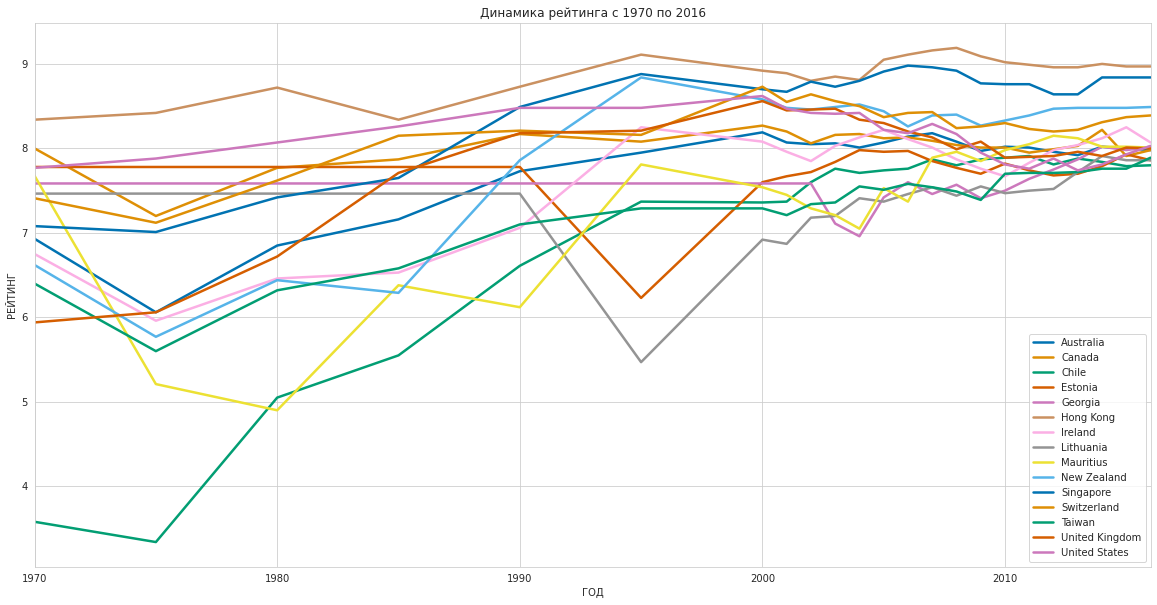

In [16]:
names = top_15_2016['COUNTRY']
top_15 = data.loc[data['COUNTRY'].isin(names)]

sns.set_palette(sns.color_palette("colorblind",15))
sns.set_style('whitegrid')

fig, ax = plt.subplots()

for key, grp in top_15.groupby(['COUNTRY']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='SCORE', label=key, figsize=(20,10), linewidth=2.5)
    
plt.xlim((1970, 2016))
plt.xlabel('ГОД')
plt.ylabel('РЕЙТИНГ')
plt.title('Динамика рейтинга с 1970 по 2016')

На этом графике видно, что большинство из этих стран всегда имели высокий индекс экономической свободы. Некоторые из них имели большие колебания в течение многих лет, вероятно, вызванные правительствами или историческими событиями.

За исключением Чили, это единственная южноамериканская страна среди 15 лучших стран в 2016 году. И самое интересное, что к середине 70-х годов Чили была страной 4-го квартиля, что связано с приходом к власти Аугусто Пиночета в результате военного переворота.

## BRICS и Казахстан

### Как только мы заговорили о развитии стран, были  взяты страны БРИКС и сравнили их с Казахстаном.

Для тех, кто не знаком, БРИКС-это аббревиатура для развивающихся экономик Бразилии, России, Индии, Китая и Южной Африки. Вместе они составляют около 25% всей суши мира и более 40% его населения.

Text(0.5, 1.0, 'Уровень BRICCS с 1970 по 2016 гг')

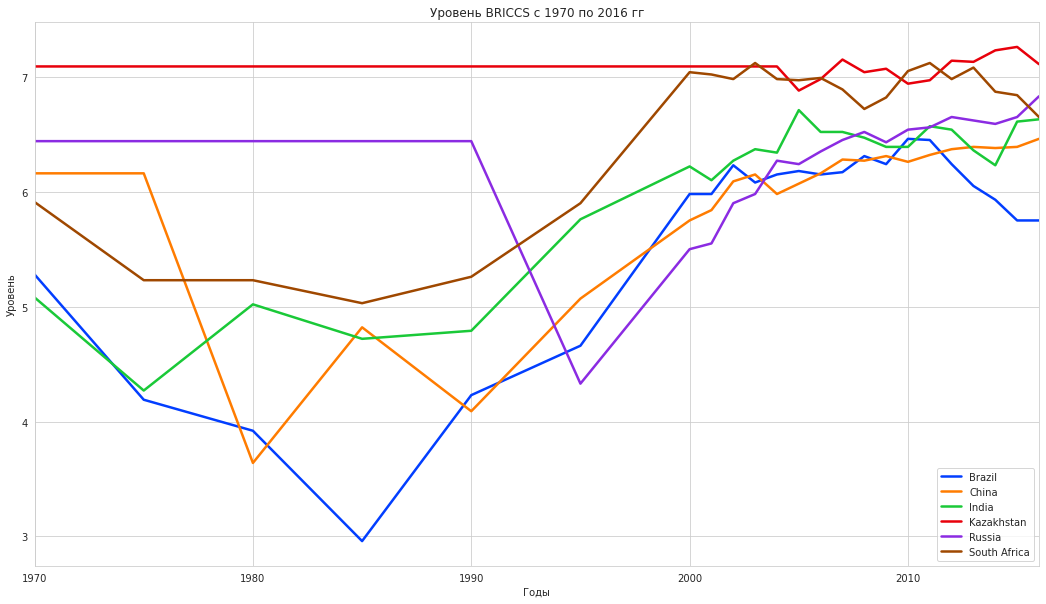

In [17]:
briccs_names = ['Brazil', 'Russia', 'India', 'China', 'Kazakhstan', 'South Africa']
briccs = data.loc[data['COUNTRY'].isin(briccs_names)]

sns.set_palette(sns.color_palette("bright",6))
sns.set_style('whitegrid')

fig, ax = plt.subplots()

for key, grp in briccs.groupby(['COUNTRY']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='SCORE', label=key, figsize=(18,10), linewidth=2.5)
    
plt.xlim((1970, 2016))
plt.legend(loc='lower right')
plt.xlabel('Годы')
plt.ylabel('Уровень')
plt.title('Уровень BRICCS с 1970 по 2016 гг')

На 2016 год, Казахстан занимает более высокий уровень Экономической свободы, чем какая либо из стран BRICS, это возможно связанно с неверной статистикой, так как данные появляются с середины 2000-х годов, значения до этого заменены медианой. Подобное, наблюдается и у России до 90-го года, что обуславливается тем, что до этого периода был СССР и данных не было.





Среди стран БРИКС все страны имеют индекс от 6,0 до 7,0, за исключением Бразилии, которая остается ниже 6,0. В Казахстане значение выше 7,0.


# Получение описательной статистики по вссем колонкам с числовыми значениями

In [18]:
data.describe()

,YEAR,SCORE,RANK,GOV_CONSUMPTION,TRANSFERS,GOV_ENTERPRISES,TOP_MARG_TAX_RATE,GOV_SIZE,IMPARTIAL_COURTS,PROTEC_PROP_RIGHTS,MILITARY_INTERF,INTEGRITY_LEGAL_SYST,GENDER_ADJUSTMENT,PROPERTY_RIGHTS,MONEY_GROWTH,STD_INFLATION,INFLATION,FOREIGN_CURRENCY,SOUND_MONEY,TARIFFS,BLACK_MARKET,CONTROL_MOVEMENT,TRADE,CREDIT_MARKET_REG,LABOR_MARKET_REG,REGULATION
count,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000
mean,2001.347826,6.515335,73.024960,5.784253,7.862170,5.757381,6.168411,6.283054,4.563845,5.244434,6.344927,6.104630,0.868207,5.153590,8.275222,7.841596,8.499659,6.090311,7.682062,7.197025,9.165198,4.347104,6.697464,7.772591,6.252028,6.668133
std,12.735125,1.068135,41.484718,2.396125,2.029469,3.227012,2.592352,1.421603,1.686902,1.881292,2.774246,2.220676,0.177656,1.694551,1.649476,2.328056,1.804226,4.268328,1.731818,1.733128,2.389756,2.590635,1.625999,2.051321,1.466883,1.170848
min,1970.000000,1.970000,1.000000,0.000000,0.000000,0.000000,0.000000,0.653797,0.000000,0.000000,0.000000,0.000000,0.000000,0.955583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.837167,1.002000
25%,1995.000000,5.880000,38.000000,4.378050,6.563044,4.000000,4.500000,5.248190,3.305208,4.000000,4.200000,4.166667,0.777778,3.929336,7.903541,7.344000,8.196521,0.000000,6.666809,6.401778,10.000000,2.154675,6.031023,6.884388,5.183167,5.958429
50%,2005.000000,6.650000,73.000000,6.002941,8.623740,6.000000,6.500000,6.350345,4.200000,5.042113,6.666667,6.250000,0.948718,5.148444,8.698423,8.757112,9.049569,7.500000,7.993770,7.611111,10.000000,4.714581,6.945272,8.291690,6.364111,6.769550
75%,2011.000000,7.285000,105.000000,7.617294,9.461823,8.000000,8.000000,7.306694,5.605526,6.477499,8.333333,8.333300,1.000000,6.166167,9.257303,9.339085,9.543984,10.000000,9.172931,8.345355,10.000000,6.335143,7.812090,9.322742,7.339918,7.470723
max,2016.000000,9.190000,162.000000,10.000000,10.000000,10.000000,10.000000,9.904651,9.686000,10.000000,10.000000,10.000000,1.000000,9.278333,9.999031,9.952306,10.000000,10.000000,9.922187,10.000000,10.000000,10.000000,10.000000,10.000000,9.725000,9.439828


# Что влияет на Экономическую свободу?

Построим тепловую корреляционную таблицу по всем столбцам

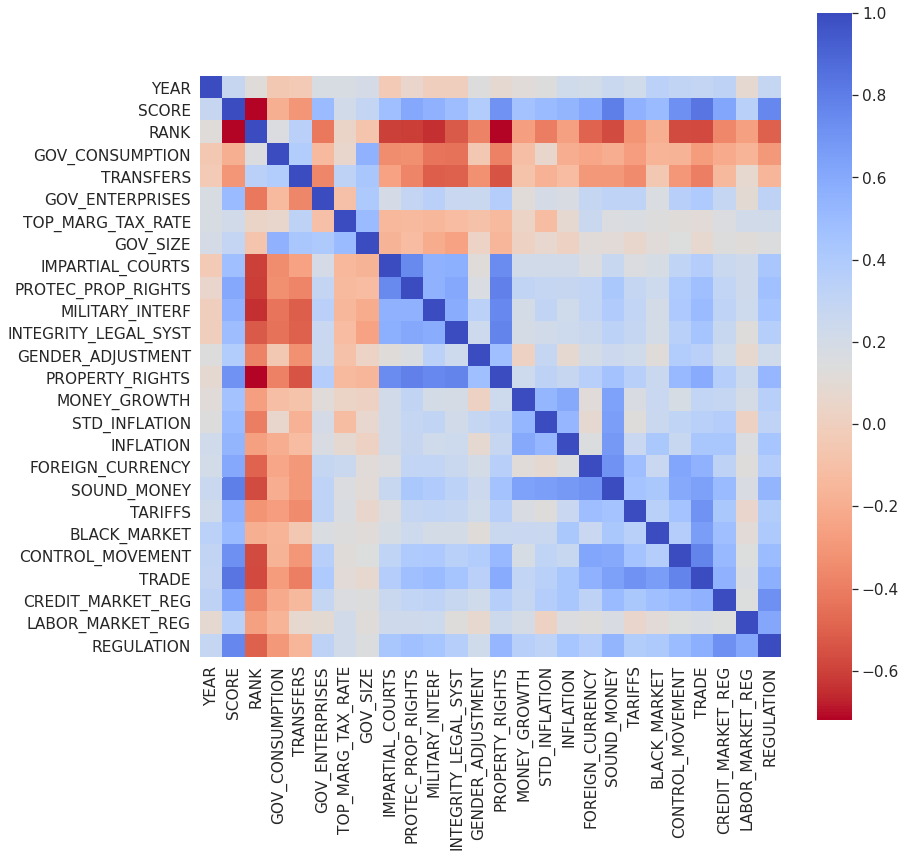

In [19]:
data_num = data._get_numeric_data()
data_cor = data_num.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(13,13))
sns.heatmap(data_cor,  square=True, cmap='coolwarm_r')

Для наглядности построим тепловую корреляционную матрицу на основе столбцлв: "Экономической свободы", "Размера правительства", "Правовая система", "Надежные деньги", "Свободная торговля", "Регулирование"

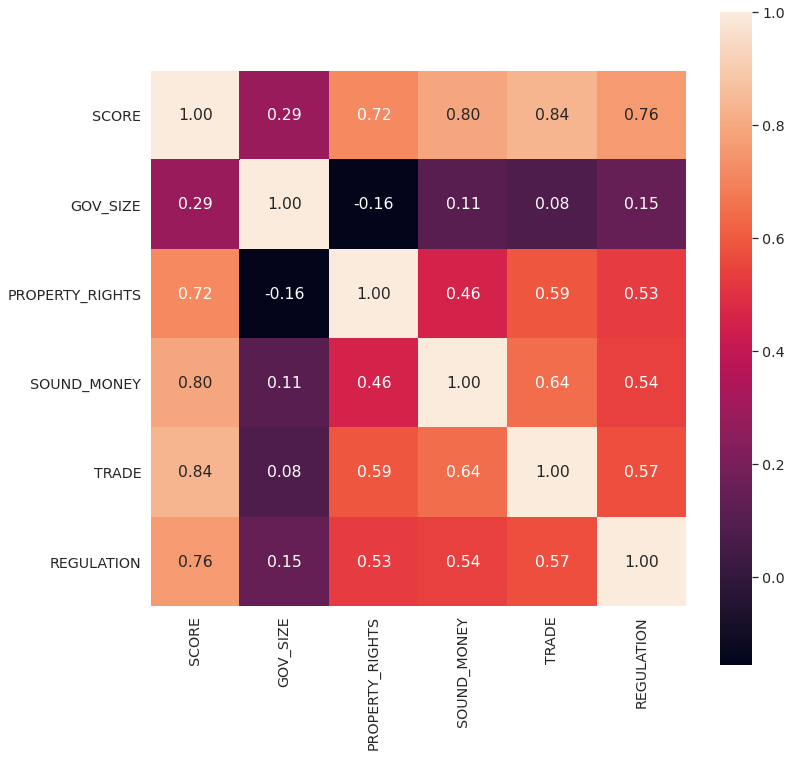

In [20]:
data_hit=data[['SCORE', 'GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']]
sns.set(font_scale=1.3)
x,ax=plt.subplots(figsize=(12,12))
sns.heatmap(data_hit.corr(),cbar=True,annot=True,fmt='.2f',square=True)

Получив корреляционную таблицу, приходим к выводу, что на индекс экономической свободы сильнее всего влияют: индекс биржевой торговли, надежные деньги и регулирование. При этом размер правительства слабо влияет на уровень экономической свободы.

#  Построение модели

Строим регрессионную модель, где Y - Уровень Экономической свободы, а за X принимаем массив из столбцов ["Размер правительства", "Права и Свободы", "Надежность денег", "Свободную торговлю" и "Регулирование"

In [21]:
Y = data['SCORE']
X = data[['GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']]

Строим модель и таблицу

In [22]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 2.223e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:58:33   Log-Likelihood:                 857.83
No. Observations:                3726   AIC:                            -1704.
Df Residuals:                    3720   BIC:                            -1666.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1772      0.022     

Итог:
R квадрат и R квадрат перещитанный 0,968, что говорит о высокой точности модели, F-статистика незначительна, можно предположить, что вероятность ошибки регрессии незначительна. При этом, имеется смещение и высокий куртосис больше 3, тест Харке-Бера значительно отличен от 0, поэтому отклоняем нулевую гепотизу о нормальном распределении. Критерий Дарбин-Вотсана близок к 2, значит, что нет автокорреляции, t статистика говорит о том, чо все переменные значимы.

Посчитаем Коэффициент инфляции, эмпирическое правило гласит, что если ВИФ больше 10, то присутствует мультиколлениарность, а это говорит о том, что необходимо убрать лишний параметр и пересчитывать 

In [23]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif = vif.drop([0])

In [24]:
vif

,VIF,variable
1,1.130251,GOV_SIZE
2,1.852256,PROPERTY_RIGHTS
3,1.856841,SOUND_MONEY
4,2.238694,TRADE
5,1.795487,REGULATION


In [25]:
print(model.params)

const              0.177167
GOV_SIZE           0.186342
PROPERTY_RIGHTS    0.201158
SOUND_MONEY        0.190776
TRADE              0.198816
REGULATION         0.199991
dtype: float64


$$SCORE = Const + w_1 \times X_1 + w_2 \times X_2 + w_3 \times X_3 + w_4 \times X_4 + w_5 \times X_5$$


Общее уравнение получается: 
$$SCORE = 0,177167 + 0,186342 \times GOVSIZE + 0,201158 \times PROPERTYRIGHTS + 0.190776 \times SOUND_MONEY + 0.198816 \times TRADE +  0.199991 \times REGULATION $$

#Перекрестная валидация: оценка эффективности оценщика

Изучение параметров функции предсказания и тестирование ее на одних и тех же данных является методологической ошибкой: модель, которая просто повторяла бы метки образцов, которые она только что видела, имела бы идеальную оценку, но не смогла бы предсказать ничего полезного на еще невидимых данных. Такая ситуация называется переобучением. Чтобы избежать этого, общепринятой практикой при выполнении (контролируемого) эксперимента машинного обучения является сохранение части доступных данных в виде тестового набора X_test, y_test. Обратите внимание, что слово “эксперимент” не предназначено для обозначения только академического использования, потому что даже в коммерческих условиях машинное обучение обычно начинается экспериментально. Вот блок-схема типичного рабочего процесса перекрестной проверки в обучении модели. Наилучшие параметры могут быть определены методами поиска сетки.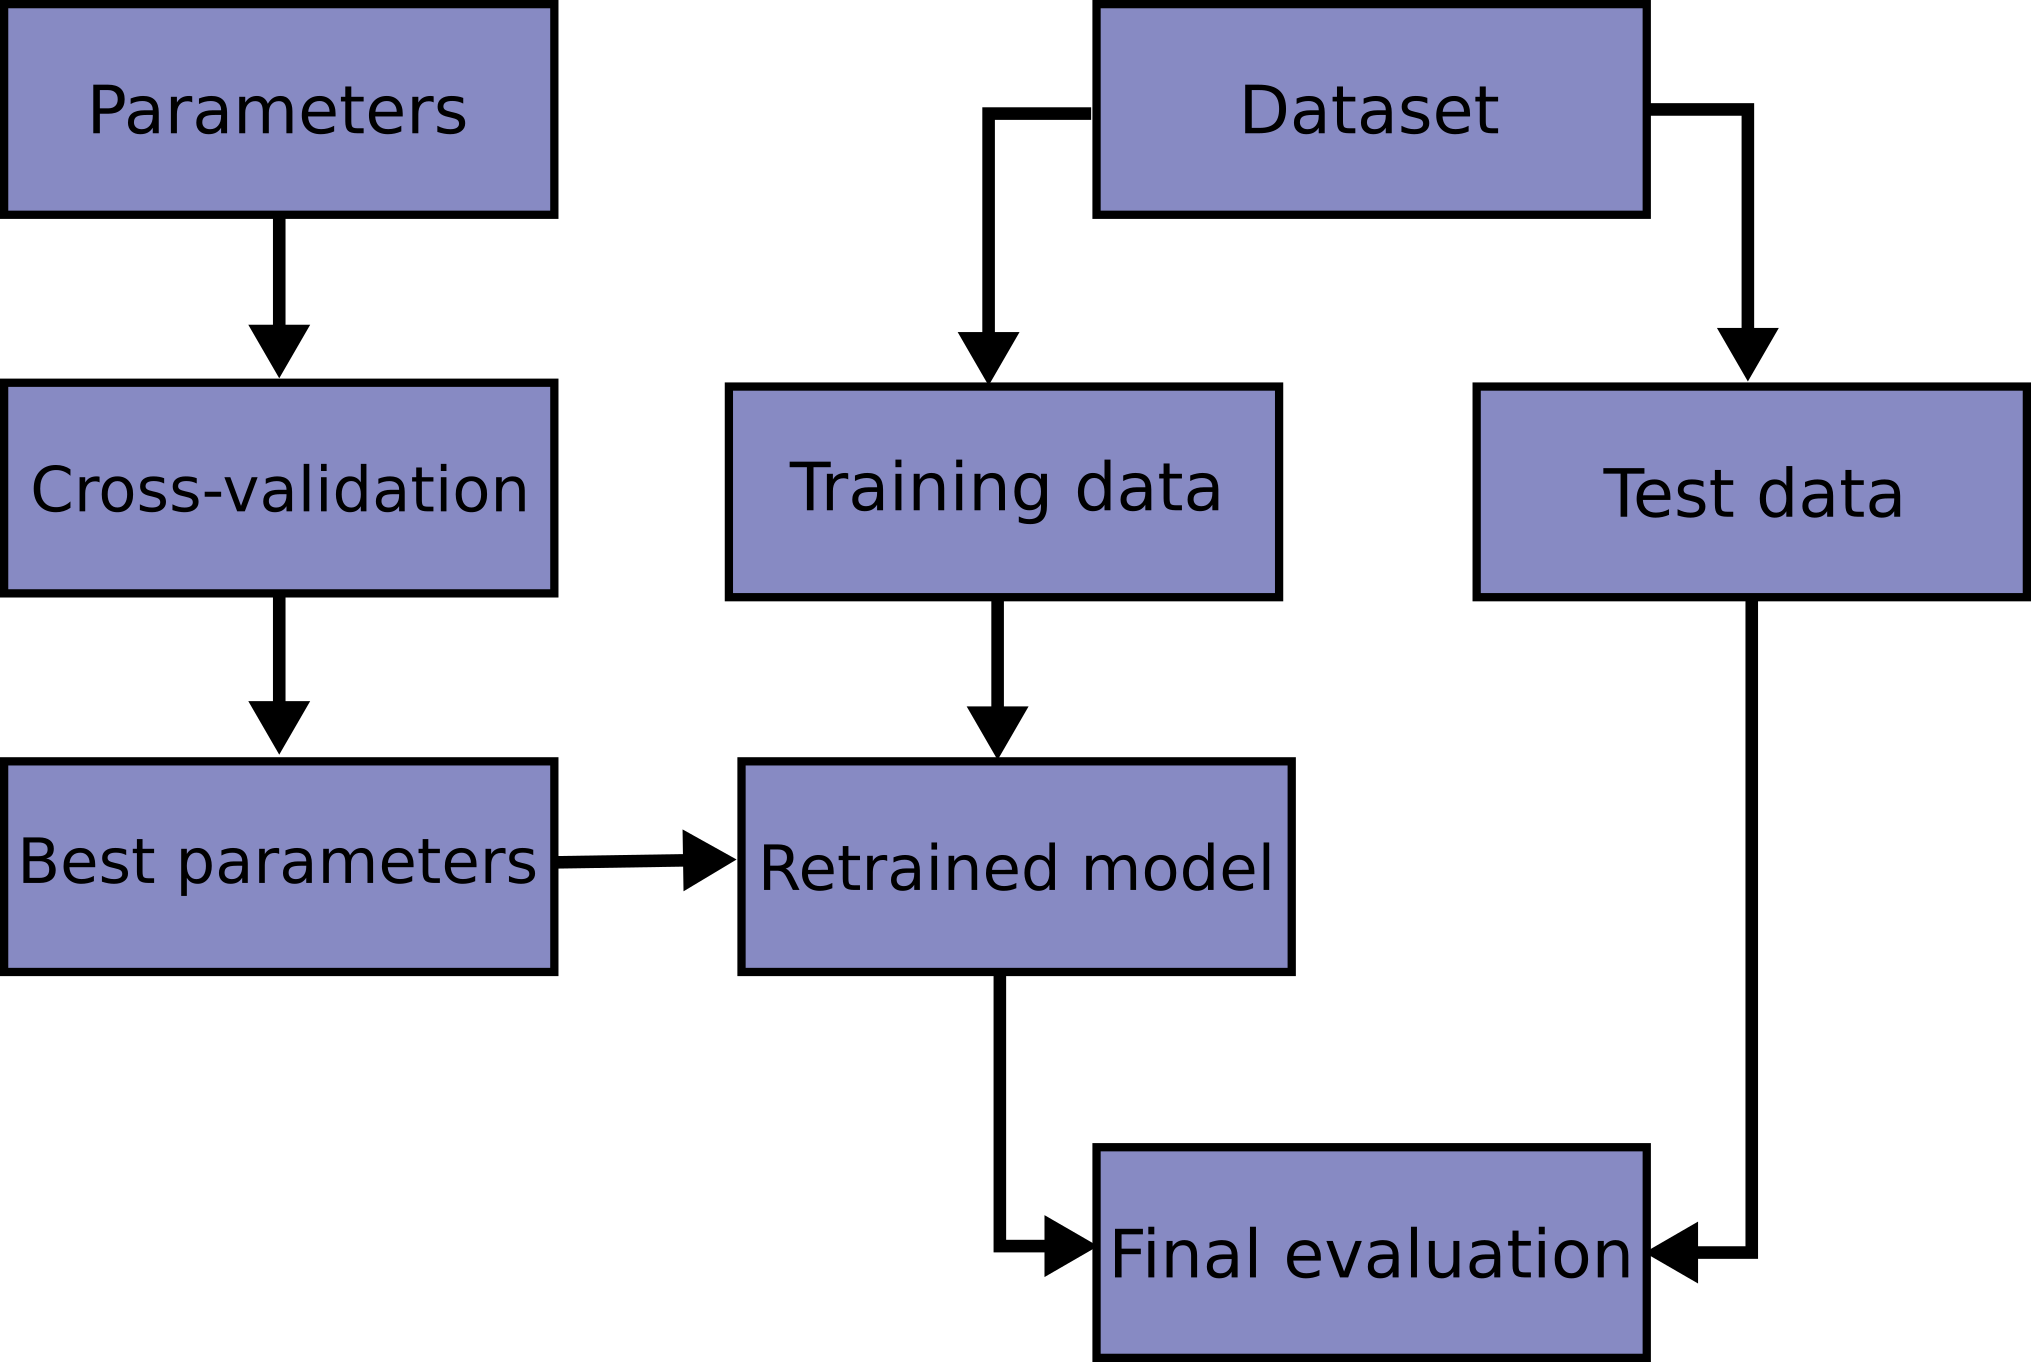

Проверяем наш датасет, на размер. Где Y - Уровень Экономической свободы, а за X принимаем массив из столбцов ["Размер правительства", "Права и Свободы", "Надежность денег", "Свободную торговлю" и "Регулирование"

In [26]:
Y=Y.astype('int')
X.shape, Y.shape

((3726, 6), (3726,))

Разделяем датасет на тестовый и тренировочный в соотношении 4 к 6, данный параметр можно регулировать с помощью параметра test_size

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

((2235, 6), (2235,))

In [28]:
X_test.shape, y_test.shape

((1491, 6), (1491,))

Выше проверили размеры выборок

Теперь мы можем быстро пробовать обучающий набор, удерживая 40% данных для тестирования (оценки) нашего классификатора:

При оценке различных параметров (“гиперпараметров”) для оценок, таких как параметр C, который должен быть установлен вручную для SVM, все еще существует риск переоснащения тестового набора, поскольку параметры могут быть изменены до тех пор, пока оценка не будет работать оптимально. Таким образом, знания о тестовом наборе могут “просочиться” в модель, и оценочные метрики больше не будут сообщать о производительности обобщения. Чтобы решить эту проблему, еще одна часть набора данных может быть проведена как так называемый “набор проверки”: обучение продолжается на обучающем наборе, после чего оценка выполняется на наборе проверки, и когда эксперимент кажется успешным, окончательная оценка может быть сделана на тестовом наборе.

In [29]:
clf = svm.SVC(C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9208584842387659

Следовательно, средний балл и стандартное отклонение задаются формулой:

In [30]:
scores = cross_val_score(clf, X, Y, cv=5)
print("%0.2f средний бал точности и стандартное отклонение %0.2f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



0.92 средний бал точности и стандартное отклонение 0.05


Это нам говорит о том, что точность модели на тестовой выборке показал точность в 92% и со статным откнлонением значений тестовой выборки от значений полученных на тренировочной выборке равно 0,05

# Метод Дерева решений

Деревья решений (DTS)-это непараметрический метод контролируемого обучения, используемый для классификации и регрессии. Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной, изучая простые правила принятия решений, выведенные из особенностей данных. Дерево можно рассматривать как кусочно-постоянное приближение.
Например, в приведенном ниже примере деревья решений учатся на основе данных аппроксимировать синусоидальную кривую с помощью набора правил принятия решений if-then-else. Чем глубже дерево, тем сложнее правила принятия решений и тем лучше модель.

Некоторые преимущества деревьев решений заключаются в следующем:

*Просто понять и интерпретировать.

*Деревья можно визуализировать.

*Требует небольшой подготовки данных. 

*Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений. Однако обратите внимание, что этот модуль не поддерживает пропущенные значения

*Стоимость использования дерева (т. е. прогнозирование данных) логарифмически зависит от количества точек данных, используемых для обучения дерева.
Способен обрабатывать как числовые, так и категориальные данные. Однако реализация scikit-learn пока не поддерживает категориальные переменные. Другие методы обычно специализируются на анализе наборов данных, которые имеют только один тип переменной. 

*Способен справляться с проблемами с несколькими выходами.

*Использует модель белого ящика. Если данная ситуация наблюдаема в модели, то объяснение этого условия легко объясняется булевой логикой. Напротив, в модели черного ящика (например, в искусственной нейронной сети) результаты могут быть более трудными для интерпретации.

*Можно проверить модель с помощью статистических тестов. Это позволяет учесть надежность модели.

*Работает хорошо, даже если его предположения несколько нарушаются истинной моделью, из которой были получены данные.

К недостаткам деревьев решений относятся:

*Изучающие дерево решений могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка, установка минимального количества образцов, необходимых в листовом узле, или установка максимальной глубины дерева.

*Деревья принятия решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема смягчается с помощью деревьев решений внутри ансамбля.

*Известно, что задача изучения оптимального дерева решений является NP-полной при нескольких аспектах оптимальности и даже для простых понятий. Следовательно, практические алгоритмы обучения дерева решений основаны на эвристических алгоритмах, таких как жадный алгоритм, где локально оптимальные решения принимаются на каждом узле. Такие алгоритмы не могут гарантировать возврат глобально оптимального дерева решений. Это может быть смягчено обучением нескольких деревьев в ансамбле обучающегося, где объекты и выборки случайным образом отбираются с заменой.
Есть понятия, которые трудно выучить, потому что деревья решений не выражают их легко, такие как проблемы XOR, четности или мультиплексора.
Учащиеся дерева решений создают предвзятые деревья, если некоторые классы доминируют. Поэтому рекомендуется сбалансировать набор данных перед подгонкой к дереву решений.

Обучим модель, суть в том, что на каждом шаге падает индекс экономической свободы, и сколько стран подходит под этот уровень, если нет возможности сделать следующий шаг, то присваивается уровень ячейки, так можно уменьшить колличество шагов, что по идее снизит риск переобучения, но в условии различных варианов, сложно и долго настраивать моель

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Строим дерево решений

[Text(221.57723292395693, 212.26285714285714, 'X[4] <= 7.569\ngini = 0.73\nsamples = 3726\nvalue = [1, 14, 85, 248, 694, 1306, 1209, 161, 8]'),
 Text(141.52326631897714, 201.90857142857143, 'X[4] <= 6.08\ngini = 0.693\nsamples = 2549\nvalue = [1, 14, 85, 248, 684, 1159, 340, 18, 0]'),
 Text(71.65333950201884, 191.5542857142857, 'X[4] <= 4.92\ngini = 0.685\nsamples = 998\nvalue = [1, 14, 81, 232, 476, 160, 34, 0, 0]'),
 Text(34.448802153432034, 181.2, 'X[5] <= 5.393\ngini = 0.704\nsamples = 418\nvalue = [1, 13, 76, 171, 126, 23, 8, 0, 0]'),
 Text(19.87170928667564, 170.84571428571428, 'X[4] <= 3.533\ngini = 0.615\nsamples = 224\nvalue = [1, 13, 68, 118, 24, 0, 0, 0, 0]'),
 Text(10.183687752355317, 160.49142857142857, 'X[3] <= 5.928\ngini = 0.594\nsamples = 120\nvalue = [1, 12, 64, 40, 3, 0, 0, 0, 0]'),
 Text(5.7677523553162855, 150.13714285714286, 'X[3] <= 1.946\ngini = 0.486\nsamples = 79\nvalue = [1, 12, 54, 12, 0, 0, 0, 0, 0]'),
 Text(2.8838761776581427, 139.78285714285715, 'X[2] <= 

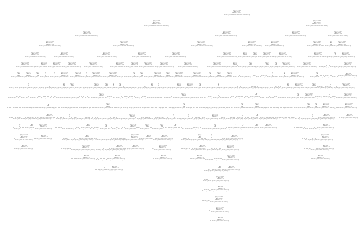

In [32]:
tree.plot_tree(clf) 

Получилось не очень понятно, масштаб нечитабелен, поэтому используем библиотеку graphviz, которая позволяет конвертирует в пдф

In [33]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Tree") 

'Tree.pdf'

In [34]:
print('Средний бал точности - ',clf.score(X, Y).mean())
print('Стандартное отклонение - ',clf.score(X, Y).std())

Средний бал точности -  1.0
Стандартное отклонение -  0.0


Точность модели 100%, а стандартное отклонение 0 - что может значить либо переобученность, либо модель верна. Это один из минусов дерева решений, модель легко переобучаема, если не сдерживать уровень слоев дерева, так как дерево будет делиться до тех пор, пока есть такая возможность, но это влияет на переобучение и на вычислительнресурыесы.

# Вывод


В данной работе было проведено исследование определяющее, что явя олсновными факторами для выставления индекса Экономической свободы. Были рассмотрены динамики и ТОП-ы сран, включая Казахстан,  выводс, что Казахстан является страной с достаточно высоким уровнем свободы (Основываясь на данных). С помощю анализа корреляций факторов были определены основные показатели: "Размер правительства", "Правовая свобода", "Надежность денег", надичае "Свободной торговли" и "Регулирование". На е полученоной информации был применен метод стмвенной регрессии, для получения функционального уравния. Функциональное уравнение показывает, как и в каком отношении, показатели выше, влияют на индекс Экономической свободы в целом. Для проверки модели были использован метод кросс-валидации, суть которого в том, что разделив данные проверить на части выборки и протестировать на остатке и на сколько отличаются значения предсказанные и фактические. В нашей модели высокий показатель точности и относительно низкое отклонение. Так же был применен метод Дерева решений, суть которого в разделение по принципу да и нет, глубина дерева может контролироваться во избежании переобучения, да и корректности модели. 

##Вывод по среде
Использование Google Colabaratory + Python позволяет без установления ПО работать с данными. При знании работы с библиотеками позволяет гибко настраивать все под себя и выводить любую информацию, а так же работать с данными в любом ключе. Что является приемуществом перед средами Eviws, Gretl, Minitab, Excel, где есть ограничения в размерах данных, формата даннных. Так же одним из плюсов является то, что работает система быстрее, чем через приложение. Еще плюс, облачное решение, можно продолжать работать с любого устройств и в любом месте, главное - учетная запись Гугл.